In [14]:
print('Welcome to RockPy without RockPy')
print('Have fun ... ')

Welcome to RockPy without RockPy
Have fun ... 


In [15]:
1+1

2

In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt

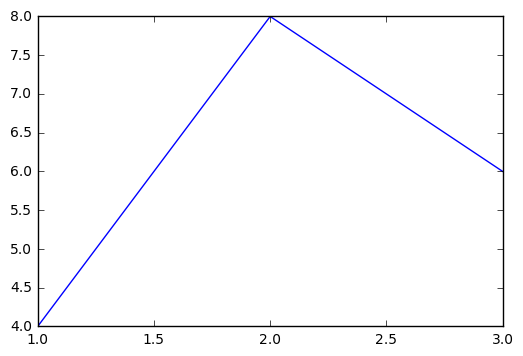

In [19]:
plt.plot([1,2,3],[4,8,6])

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np

winterAzi = np.array([10,20,30])
winterAlt = np.array([10,20,30])

# create instance of basemap, note we want a south polar projection to 90 = E
myMap = Basemap(projection='spstere',boundinglat=0,lon_0=180,resolution='l',round=True,suppress_ticks=True)
# set the grid up
gridX,gridY = 10.0,15.0
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid, not labels are off. We have to manually create these.
myMap.drawparallels(parallelGrid,labels=[False,False,False,False])
myMap.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')

# we have to send our values through basemap to convert coordinates, note -winterAlt
winterX,winterY = myMap(winterAzi,-winterAlt)

# plot azimuth labels, with a North label.
ax = plt.gca()
ax.text(0.5,1.025,'N',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
for para in np.arange(gridY,360,gridY):
    x= (1.1*0.5*np.sin(np.deg2rad(para)))+0.5
    y= (1.1*0.5*np.cos(np.deg2rad(para)))+0.5
    ax.text(x,y,u'%i\N{DEGREE SIGN}'%para,transform=ax.transAxes,horizontalalignment='center',verticalalignment='center')


# plot the winter values
myMap.plot(winterX,winterY ,'bo')

# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = myMap(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = myMap.contour(x,y,wave+mean,15,linewidths=1.5)

NameError: name 'plt' is not defined

In [2]:
input_form = """
<div style="border:solid navy; padding:20px;">
<input type="file" id="file_selector" name="files[]"/>
<output id="list"></output>
</div>
"""

javascript = """
<script type="text/Javascript">
  function handleFileSelect(evt) {
    var kernel = IPython.notebook.kernel;
    var files = evt.target.files; // FileList object
    console.log('Executing orig')
    console.log(files)
    // files is a FileList of File objects. List some properties.
    var output = [];
    var f = files[0]
    
    
    var r = new FileReader();
            r.onload = (function (f) {
                return function (e) {
                    var contents = e.target.result;
                    //alert(contents);
                    var command = 'fcont = "' + '"' + '"' + contents + '"'+'"'+'"'
                    alert(command)
                    console.log(command)
                    kernel.execute(command);
                };
            })(f);
            r.readAsText(f);
            
    output.push('<li><strong>', escape(f.name), '</strong> (', f.type || 'n/a', ') - ',
                  f.size, ' bytes, last modified: ',
                  f.lastModifiedDate ? f.lastModifiedDate.toLocaleDateString() : 'n/a',
                  '</_Mli>');        
    
    document.getElementById('list').innerHTML = '<ul>' + output.join('') + '</ul>';
    var command = 'fname = "' + f.name + '"'
    console.log(command)
    kernel.execute(command);
  }

  document.getElementById('file_selector').addEventListener('change', handleFileSelect, false);
</script>
"""

def file_selector():
    from IPython.display import HTML, display
    display(HTML(input_form + javascript))
    #return fname

In [3]:
file_selector()

<div style="border:solid navy; padding:20px;">
<input type="file" id="file_selector" name="files[]"/>
<output id="list"></output>
</div>

<script type="text/Javascript">
  function handleFileSelect(evt) {
    var kernel = IPython.notebook.kernel;
    var files = evt.target.files; // FileList object
    console.log('Executing orig')
    console.log(files)
    // files is a FileList of File objects. List some properties.
    var output = [];
    var f = files[0]
    
    
    var r = new FileReader();
            r.onload = (function (f) {
                return function (e) {
                    var contents = e.target.result;
                    //alert(contents);
                    var command = 'fcont = "' + '"' + '"' + contents + '"'+'"'+'"'
                    alert(command)
                    console.log(command)
                    kernel.execute(command);
                };
            })(f);
            r.readAsText(f);
            
    output.push('<li><strong>', escape(f.name), '</strong> (', f.type || 'n/a', ') - ',
                  f.size, ' bytes, last modified: ',
                  f.lastModifiedDate ? f.lastModifiedDate.toLocaleDateString() : 'n/a',
                  '</_Mli>');        
    
    document.getElementById('list').innerHTML = '<ul>' + output.join('') + '</ul>';
    var command = 'fname = "' + f.name + '"'
    console.log(command)
    kernel.execute(command);
  }

  document.getElementById('file_selector').addEventListener('change', handleFileSelect, false);
</script>